<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/FIN_Y_FTC_Casa_de_Bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [15]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving Valor de la Unidad.xlsx to Valor de la Unidad (2).xlsx


# **Cargar datos**

In [83]:
FIN = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FIN")

In [84]:
FTC = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FTC")

In [85]:
FIN['Fecha'] = pd.to_datetime(FIN['Fecha'])
FTC['Fecha'] = pd.to_datetime(FTC['Fecha'])

In [86]:
FIN.set_index('Fecha', inplace=True)
FTC.set_index('Fecha', inplace=True)

In [87]:
FIN.head()

,Valor Fondo,Valor Unidad,Unidades en Circulación,Rendimientos,Comisión Fija,Comisión Exito,Retención,Factor Retenc.,Rentab Diaria,Rentab Bruta,Rent Mes Eje Izq,Suscrip tores,Total Aperturas,Total Adiciones,Total Retiros,Imp. Retiros,Total Cancel,Imp. Cancel,Total NC,Total ND
Fecha,,,,,,,,,,,,,,,,,,,,
2023-04-27,4.075393e+07,1000.00,40753.93,0.00,0.00,0,0,0,0.00,0.00,0.0,1,40753930,0.000000e+00,0.0,0,0,0,0,0
2023-04-28,2.081243e+10,988.22,21060439.60,-479922.23,390.11,0,0,0,-0.99,-0.99,0.0,1,0,2.077216e+10,0.0,0,0,0,0,0
2023-04-29,2.082169e+10,988.66,21060439.60,9256151.44,199223.76,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-04-30,2.083098e+10,989.10,21060439.60,9298926.12,199312.36,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-05-01,2.084028e+10,989.55,21060439.60,9297320.57,199401.38,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0


In [88]:
FTC.head()

,Valor Fondo,Valor Unidad,Unidades en Circulación,Rendimientos,Comisión Fija,Comisión Exito,Retención,Factor Retenc.,Rentab Diaria,Rentab Bruta,Rent Mes Eje Izq,Suscrip tores,Total Aperturas,Total Adiciones,Total Retiros,Imp. Retiros,Total Cancel,Imp. Cancel,Total NC,Total ND
Fecha,,,,,,,,,,,,,,,,,,,,
2023-04-27,2.833568e+07,1000.00,28335.69,0.00,0.00,0,0,0,0.00,0.00,0.0,1,28335685,0.000000e+00,0.0,0,0,0,0,0
2023-04-28,1.403352e+10,988.22,14200745.04,-333683.78,271.24,0,0,0,-0.99,-0.99,0.0,1,0,1.400551e+10,0.0,0,0,0,0,0
2023-04-29,1.403921e+10,988.62,14200745.04,5690237.51,134333.66,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-04-30,1.404491e+10,989.03,14200745.04,5703307.11,134388.12,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-05-01,1.405061e+10,989.43,14200745.04,5698349.59,134442.72,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0


Text(0.5, 0, 'Fecha')

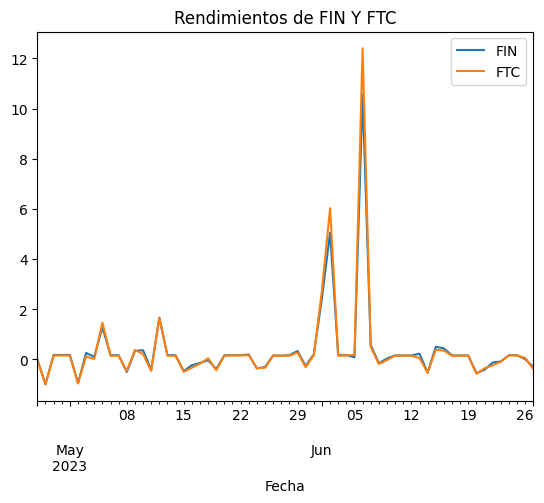

In [157]:
FIN['Rentab Diaria'].plot()
FTC['Rentab Diaria'].plot()
plt.title('Rendimientos de FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')  # Rango de fechas mensuales
plt.legend(['FIN',"FTC"])
plt.xlabel('Fecha')

In [158]:
descripcion_RENDIMIENTOSFIN = FIN['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFIN

count    62.000000
mean      0.345806
std       1.546750
min      -0.990000
25%      -0.135000
50%       0.160000
75%       0.180000
max      10.560000
Name: Rentab Diaria, dtype: float64

In [159]:
descripcion_RENDIMIENTOSFTC = FTC['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFTC

count    62.000000
mean      0.373710
std       1.808426
min      -0.990000
25%      -0.177500
50%       0.150000
75%       0.160000
max      12.400000
Name: Rentab Diaria, dtype: float64

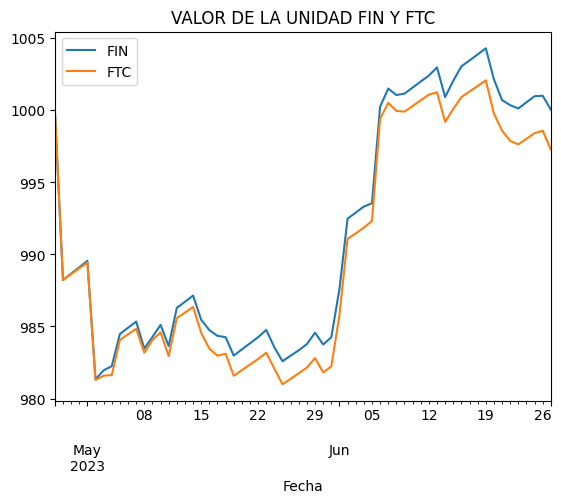

In [160]:
FIN["Valor Unidad"].plot()
FTC["Valor Unidad"].plot()
plt.title('VALOR DE LA UNIDAD FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')
plt.legend(['FIN',"FTC"])

In [161]:
descripcion_VUFIN = FIN['Valor Unidad'].describe()
descripcion_VUFIN

count      62.000000
mean      991.536129
std         8.201100
min       981.340000
25%       984.260000
50%       987.905000
75%      1000.847500
max      1004.280000
Name: Valor Unidad, dtype: float64

In [162]:
descripcion_VUFTC = FTC['Valor Unidad'].describe()
descripcion_VUFTC

count      62.000000
mean      990.219839
std         7.859528
min       980.990000
25%       982.947500
50%       987.285000
75%       999.027500
max      1002.060000
Name: Valor Unidad, dtype: float64

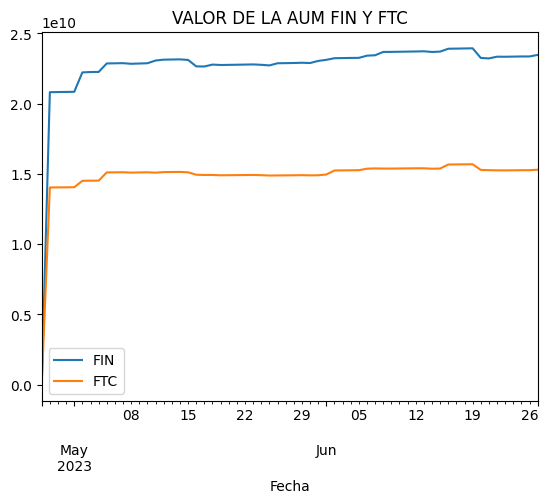

In [163]:
FIN['Valor Fondo'].plot()
FTC['Valor Fondo'].plot()
plt.title('VALOR DE LA AUM FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [164]:
FIN['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-06-23    23,334,248,578,34
2023-06-24    23,344,163,875,52
2023-06-25    23,354,065,798,74
2023-06-26    23,354,749,650,47
2023-06-27    23,465,395,197,53
Name: Valor Fondo, dtype: object

In [165]:
FTC['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-06-23    15,249,322,992,45
2023-06-24    15,255,354,161,62
2023-06-25    15,261,384,790,34
2023-06-26    15,263,984,389,26
2023-06-27    15,296,470,488,78
Name: Valor Fondo, dtype: object

In [166]:
nivel_confianza = 0.95

In [167]:
FIN['Valor Unidad'].tail()

Fecha
2023-06-23    1000.11
2023-06-24    1000.54
2023-06-25    1000.96
2023-06-26    1000.99
2023-06-27    1000.03
Name: Valor Unidad, dtype: float64

In [168]:
FIN['Rentab Diaria'].tail()

Fecha
2023-06-23   -0.08
2023-06-24    0.17
2023-06-25    0.17
2023-06-26    0.01
2023-06-27   -0.30
Name: Rentab Diaria, dtype: float64

# **Retorno_FTC**

In [169]:
RETORNO_FTC_BASE = FTC['Rendimientos']

In [105]:
Retorno_FTC = FTC['Valor Fondo']*FTC['Rentab Diaria']
Retorno_FTC.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -1.389318e+10
2023-04-29    2.246273e+09
2023-04-30    2.247185e+09
2023-05-01    2.248097e+09
dtype: float64

# **Retorno_FIN**

In [170]:
RETORNO_FIN_BASE = FIN['Rendimientos']

In [171]:
Retorno_FIN = FIN['Valor Fondo']*FIN['Rentab Diaria']
Retorno_FIN.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -2.060431e+10
2023-04-29    3.747903e+09
2023-04-30    3.749577e+09
2023-05-01    3.751251e+09
dtype: float64

# **VaR FTC**

In [172]:
var_FTC = np.percentile(RETORNO_FTC_BASE, (1 - nivel_confianza) * 100)

In [146]:
var_formatted = "{:,.2f}".format(var_FTC).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -27.544.399,58


In [173]:
historico_var_FTC = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FTC, p)
    historico_var_FTC.append(percentil)
print(historico_var_FTC)

[-13824637723.777084, -12665410346.559513, -9572696685.013422, -8461827482.587879, -8107955521.778305, -7656471189.418666, -7279812339.135702, -6997378169.986332, -6940973336.002798, -6886824155.14979, -6561872778.48391, -6217074445.921901, -5854289809.579025, -5558710168.892334, -5301354407.543864, -5134502482.831016, -5017634563.718267, -4933188702.292072, -4919245528.43262, -4852711641.8496, -4673467454.87778, -4151678004.283692, -3486014086.6688714, -3034688890.0797367, -2710432256.491375, -2569154353.62413, -1989513218.5378976, -1287250112.7639623, -637684319.0203794, -215303978.65465978, -27681940.112741955, 150991975.93355185, 349627471.29608816, 627685586.3205268, 805575076.1338346, 909053587.2188761, 920469497.591664, 1071233478.6192957, 1570318013.7380872, 1938623277.3384008, 2233365969.1810946, 2233901408.3988895, 2234436892.3469696, 2234972450.19726, 2235519870.2484746, 2236632590.489028, 2242888567.143646, 2246528456.115328, 2247085098.889264, 2247641345.0615997, 225012851

# **VaR FIN**

In [174]:
var_FIN = np.percentile(RETORNO_FIN_BASE, (1 - nivel_confianza) * 100)

In [145]:
var_formatted = "{:,.2f}".format(var_FIN).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -43.288.261,23


In [119]:
historico_var_FIN = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FIN, p)
    historico_var_FIN.append(percentil)
print(historico_var_FIN)

[-20801662531.533333, -18833317568.64459, -13922850971.890486, -12551271339.999653, -12490821105.478344, -11801291073.541935, -11204428718.809097, -10724258994.628912, -10168103027.743963, -9670643237.336151, -9567439213.360346, -9238522028.925852, -8705052292.825672, -8400938565.506415, -8020865948.82597, -7316676645.724968, -6956528251.75665, -6819541528.5771, -6305145607.913483, -5802556155.60742, -5350396704.276463, -4513219424.209752, -3540146053.6988363, -3307126420.8443565, -3077393320.6272, -2852392827.4077916, -2361767032.61781, -1772064312.10527, -1050163059.1205738, -478306646.47016954, -61496568.83187891, 121444698.1824439, 326321976.81886685, 761648384.4468715, 1348201435.5716827, 2047094279.0084171, 2295221712.856704, 2624973259.18173, 3225282651.637064, 3522912023.3742805, 3660245679.4476657, 3714257048.3120914, 3748288450.3591676, 3749309472.447144, 3750330364.48557, 3753597652.148136, 3777457323.5638523, 3790806143.80032, 3791767175.14696, 3792728834.852, 3797113462.87

# **Graficos**

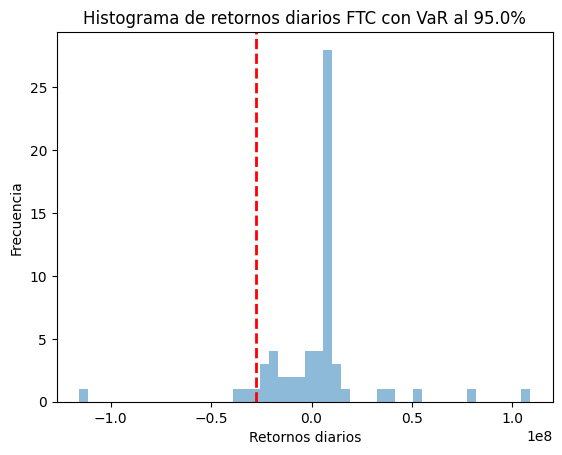

In [147]:
plt.hist(RETORNO_FTC_BASE , bins=50, alpha=0.5)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-148-9583f13e289f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FTC_BASE, shade=True)


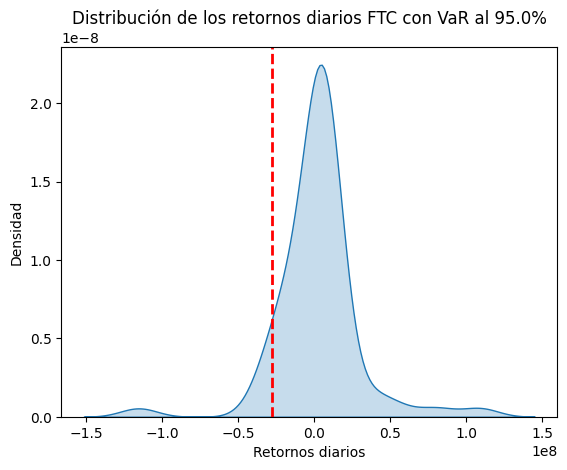

In [148]:
sns.kdeplot(RETORNO_FTC_BASE, shade=True)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

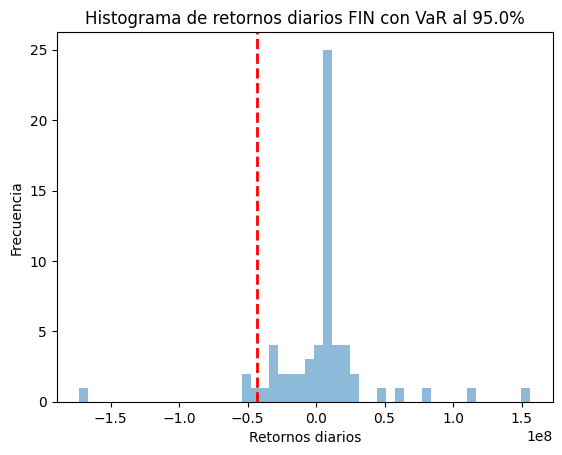

In [149]:
plt.hist(RETORNO_FIN_BASE , bins=50, alpha=0.5)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-150-74d80ddc373e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FIN_BASE, shade=True)


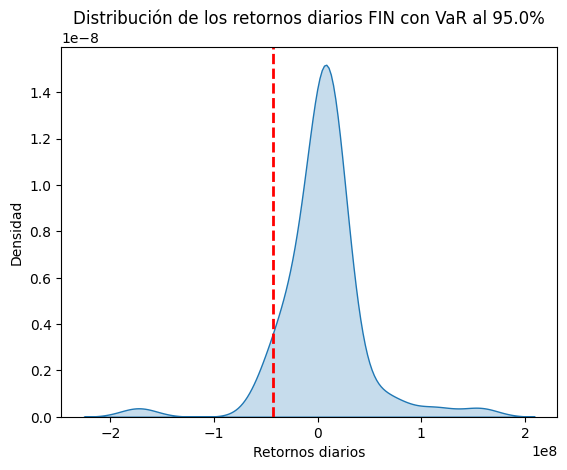

In [150]:
sns.kdeplot(RETORNO_FIN_BASE, shade=True)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

<ipython-input-152-f5b2386f87a6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FTC_BASE, shade=True,label='Retorno FTC')
<ipython-input-152-f5b2386f87a6>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FIN_BASE, shade=True,label='Retorno FIN')


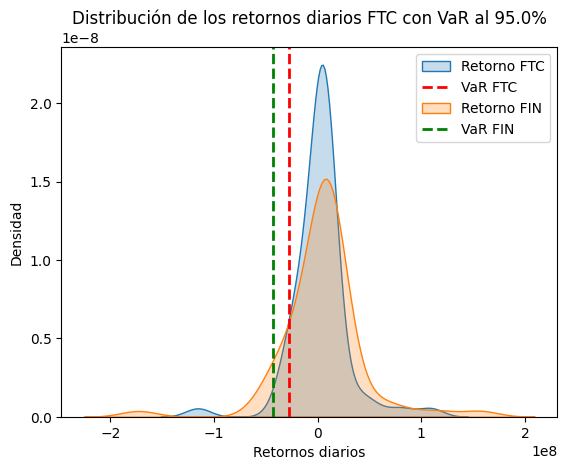

In [152]:
# Gráfico 1 - Retorno_FTC
sns.kdeplot(RETORNO_FTC_BASE, shade=True,label='Retorno FTC')
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
# Gráfico 2 - Retorno_FIN
sns.kdeplot(RETORNO_FIN_BASE, shade=True,label='Retorno FIN')
plt.axvline(x=var_FIN, color='g', linestyle='--', linewidth=2,label='VaR FIN')
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.legend()
plt.show()

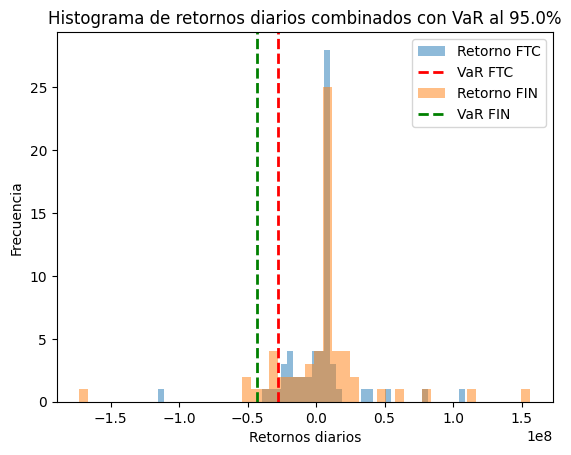

In [153]:
plt.hist(RETORNO_FTC_BASE , bins=50, alpha=0.5,label='Retorno FTC')
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2 ,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
# Gráfico 2 - Retorno_FIN
plt.hist(RETORNO_FIN_BASE , bins=50, alpha=0.5,label='Retorno FIN')
plt.axvline(x=var_FIN, color='g', linestyle='--', linewidth=2, label='VaR FIN')
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios combinados con VaR al {}%'.format(nivel_confianza * 100))
plt.legend()
# Mostrar los gráficos combinados
plt.show()

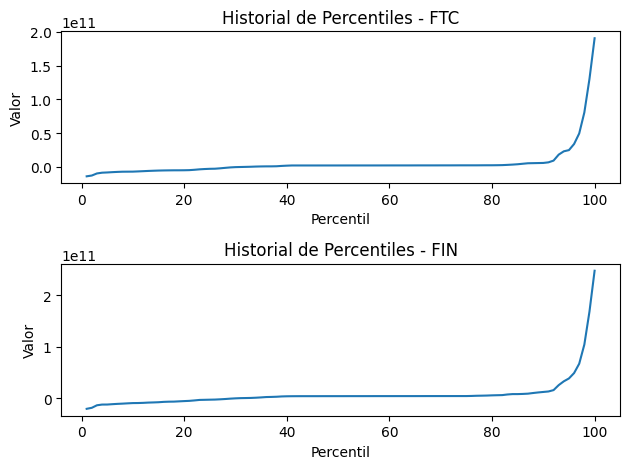

In [140]:
x = np.arange(1, 101)
# Gráfico 1
plt.subplot(2, 1, 1)
plt.plot(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles - FTC')
# Gráfico 2
plt.subplot(2, 1, 2)
plt.plot(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles - FIN')
# Ajustar los márgenes para evitar superposiciones de etiquetas
plt.tight_layout()
# Mostrar los gráficos
plt.show()

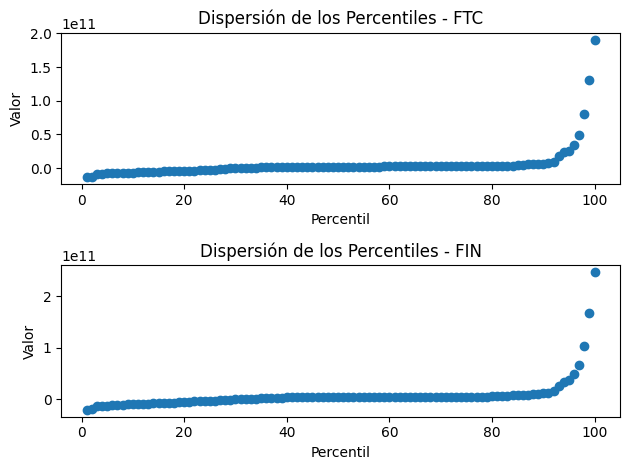

In [154]:
x = range(1, 101)
# Gráfico 1
plt.subplot(2, 1, 1)
plt.scatter(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Dispersión de los Percentiles - FTC')
# Gráfico 2
plt.subplot(2, 1, 2)
plt.scatter(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Dispersión de los Percentiles - FIN')

# Ajustar los márgenes para evitar superposiciones de etiquetas
plt.tight_layout()

# **Composición Dinamica**

In [142]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving FIN Formato portafolio diario para envío.xlsx to FIN Formato portafolio diario para envío (1).xlsx


In [69]:
FIN = pd.read_excel("/content/FIN Formato portafolio diario para envío.xlsx")

In [70]:
FIN.head()

,Fecha,Codigo,Tipo de Titulo,Nemotecnico,ISIN,En garantia,Fecha emision,Fecha vencimiento,Idemisor,Emisor,...,Tir/Precio VPN,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,2023-04-29,LIQUIDEZ,CUENTA OPERATIVA CASA DE BOLSA,No Tiene,No Tiene,NO,2018-10-19 00:00:00,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-29,LIQUIDEZ,CUENTA OMNIBUS,No Tiene,No Tiene,NO,2018-10-19 00:00:00,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-29,03310-20230428-608651,ACCIONES ORDINARIAS,CEMARGOS,NaN,N,00:00:00,00:00:00,890100251-0,CEMENTOS ARGOS S.A.,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-29,14859-20230428-608595,BONOS ORDINARIOS,BBBO2219A005,COB01CB00150,N,2021-02-10 00:00:00,2026-02-10 00:00:00,860002964-4,BANCO DE BOGOTA S.A.,...,17.976985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-29,14848-20230428-608616,CERTIFICADO DEPOSITO A TERMINO,CDTBBOS0V,COB01CD0SLV7,N,2023-02-21 00:00:00,2026-02-21 00:00:00,860002964-4,BANCO DE BOGOTA S.A.,...,13.714819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
Composicion = pd.pivot_table(FIN, values='Valor Presente', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'Acciones', 'No Tiene': 'Liquidez'}) \
    .drop(index=['Total']) \
    .style.format('{:,.2f}'.format)

In [72]:
Composicion = Composicion.data
Composicion.fillna(0, inplace=True)
corr_matrix=Composicion.corr()

In [73]:
Composicion_tail=Composicion.tail()

In [74]:
Composicion_tail.style.format('{:,.2f}'.format)

Tasa Indexada,FS,IB1,IPC,Acciones,Liquidez,Total
Fecha,,,,,,
2023-06-23 00:00:00,"10,660,310,200.00","2,402,830,000.00","6,087,290,000.00","3,797,700,914.00","400,760,087.97","23,348,891,201.97"
2023-06-24 00:00:00,"10,663,951,650.00","2,403,874,000.00","6,090,050,000.00","3,800,436,563.72","400,760,087.97","23,359,072,301.69"
2023-06-25 00:00:00,"10,667,566,600.00","2,404,911,000.00","6,092,810,000.00","3,803,192,452.42","400,760,087.97","23,369,240,140.39"
2023-06-26 00:00:00,"10,653,039,500.00","2,405,910,000.00","6,101,660,000.00","3,825,683,096.00","383,749,924.40","23,370,042,520.40"
2023-06-27 00:00:00,"10,615,034,950.00","2,401,040,000.00","6,055,155,000.00","3,798,198,224.00","602,644,714.62","23,472,072,888.62"


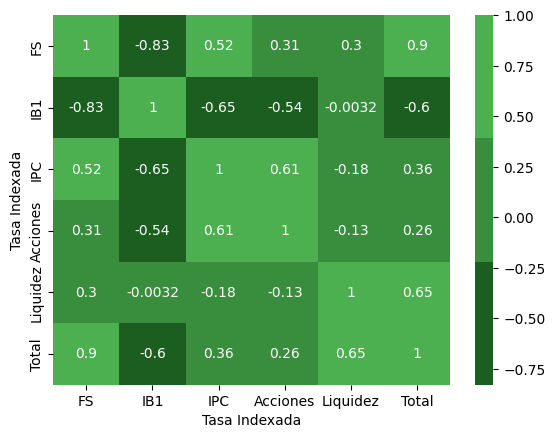

In [66]:
colors = ['#1B5E20', '#388E3C', '#4CAF50']
cmap = ListedColormap(colors)
sns.heatmap(corr_matrix,cmap=cmap, annot=True)
plt.show()

In [75]:
# Calcular la columna de porcentajes
porcentajes = Composicion.div(Composicion.iloc[:,-1], axis=0).iloc[:,:-1]
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
Composicion= pd.concat([Composicion, porcentajes], axis=0)

In [76]:
Composicion = Composicion.drop("Total", axis=1)
Composicion.tail()

,FS,IB1,IPC,Acciones,Liquidez
Fecha,,,,,
2023-06-23,0.456566,0.102910,0.260710,0.162650,0.017164
2023-06-24,0.456523,0.102910,0.260715,0.162696,0.017157
2023-06-25,0.456479,0.102909,0.260719,0.162744,0.017149
2023-06-26,0.455842,0.102948,0.261089,0.163700,0.016421
2023-06-27,0.452241,0.102293,0.257973,0.161818,0.025675


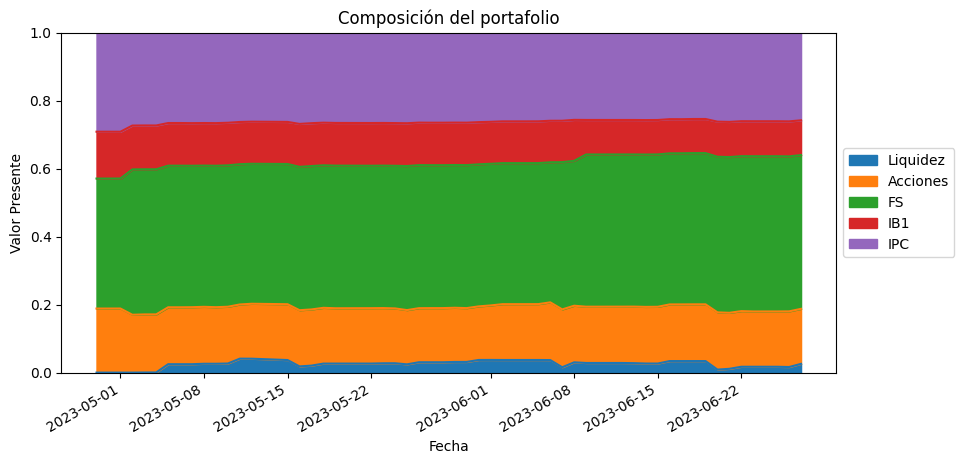

In [77]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='area', stacked=True, figsize=(10, 5), legend=True, ylim=[0, 1], y=['Liquidez','Acciones',"FS","IB1","IPC"])

# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')

# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

<ipython-input-61-6deac0024bd2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


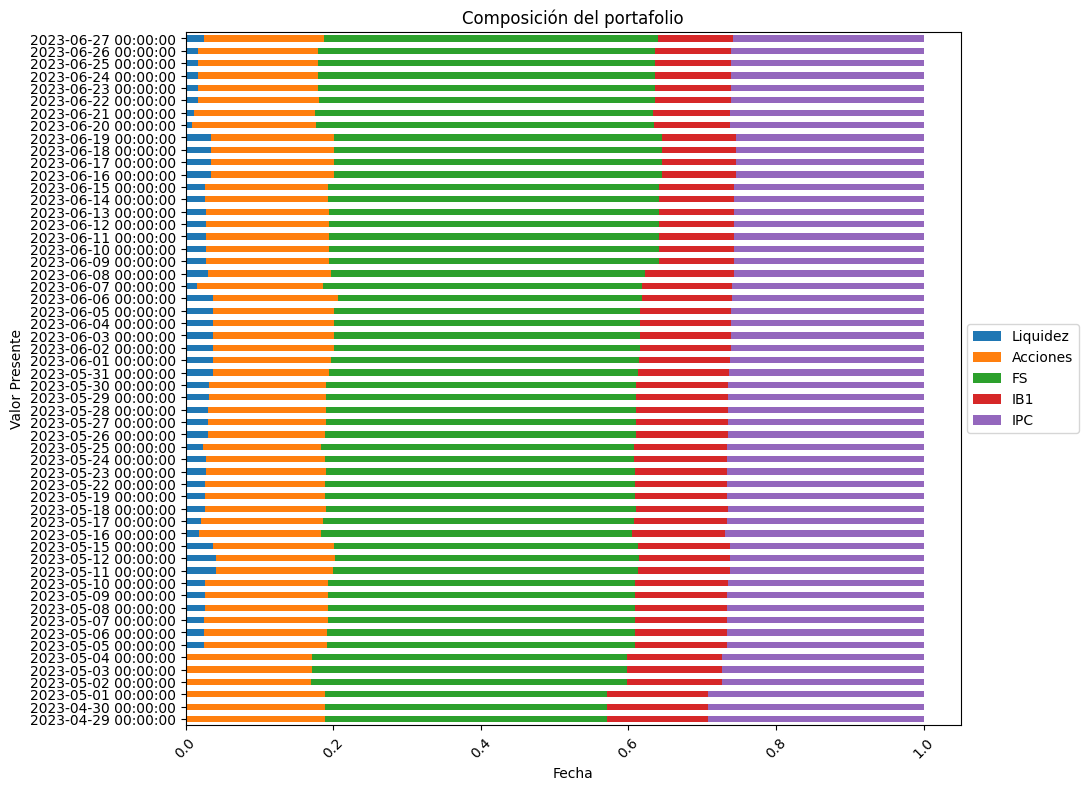

In [61]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='barh', stacked=True, figsize=(10, 9), legend=True, ylim=[0, 1], y=['Liquidez','Acciones',"FS","IB1","IPC"])
# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()